In [1]:
!mkdir -p ~/ .kaggle

In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:45<00:00, 32.1MB/s]
100% 1.06G/1.06G [00:45<00:00, 25.1MB/s]


In [14]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [17]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/dogs_vs_cats/train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/dogs_vs_cats/test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
         [172.4625   , 150.4625   , 137.4625   ],
         [169.89844  , 147.89844  , 134.89844  ]],

        [[186.41406  , 198.71484  , 202.28125  ],
         [185.81055  , 199.5351   , 202.6269   ],
         [214.3004   , 228.52496  , 231.52496  ],
         ...,
         [174.86719  , 152.86719  , 139.86719  ],
         [173.06839  , 151.06839  , 138.06839  ],
         [170.73828  , 148.73828  , 135.73828  ]],

        ...,

        [[220.58008  , 198.58008  , 177.58008  ],
         [222.50198  , 200.50198  , 179.50198  ],
         [223.95895  , 201.95895  , 180.95895  ],
         ...,
         [ 50.1762   , 120.1762   , 180.17621  ],
         [ 59.757675 , 131.75768  , 190.75768  ],
         [ 69.46478  , 140.74408  , 201.90619  ]],

        [[220.20392  , 198.20392  , 177.20392  ],
         [221.51758  , 199.51758  , 178.51758  ],
         [222.6016   , 200.6016   , 179.6016   ],
         ...,
         [ 55.416176 , 125.416176 , 1

In [19]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
model=Sequential()

In [21]:
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 71s 90ms/step - loss: 0.6050 - accuracy: 0.6673 - val_loss: 0.5191 - val_accuracy: 0.7424
Epoch 2/2
625/625 [==============================] - 53s 84ms/step - loss: 0.4803 - accuracy: 0.7682 - val_loss: 0.5050 - val_accuracy: 0.7648


In [25]:
import matplotlib.pyplot as plt

In [39]:
model.save("/content/dog_cat.h5")

In [26]:
dog_image=plt.imread(r"/content/dog sampl.jpeg")

In [27]:
cat_image=plt.imread(r"/content/cat image.jpeg")

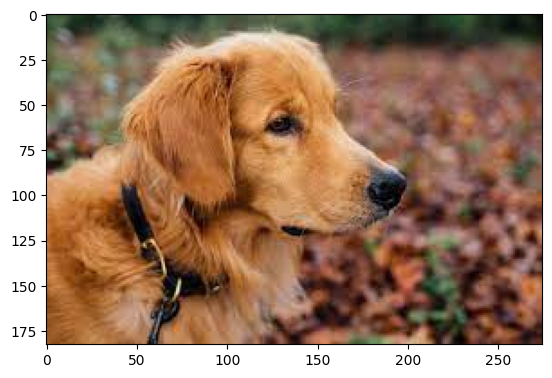

In [28]:
plt.imshow(dog_image)

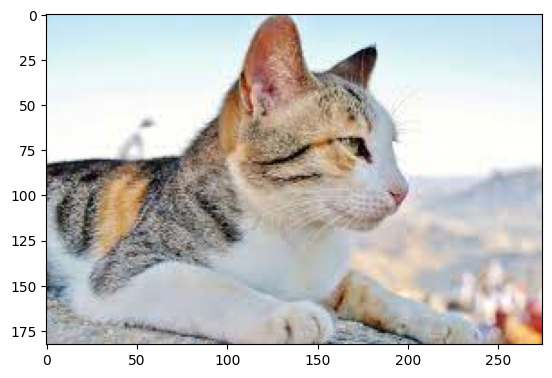

In [29]:
plt.imshow(cat_image)

In [30]:
dog_image.shape

(183, 275, 3)

In [31]:
cat_image.shape

(183, 275, 3)

In [32]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [33]:
dog_resize.shape

(256, 256, 3)

In [34]:
cat_resize.shape

(256, 256, 3)

In [35]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [36]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [37]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 214ms/step


In [38]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog


DATA Augumetation

In [40]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [49]:
myimg=tf.keras.utils.load_img(r"/content/cat image.jpeg",target_size=(200,200))

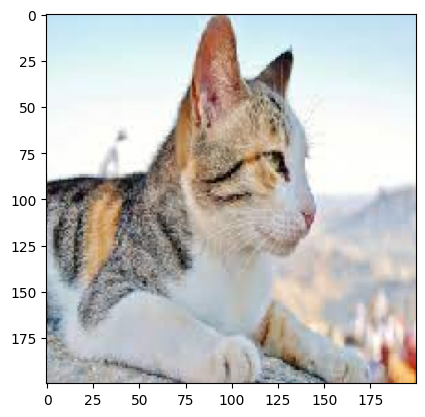

In [50]:
plt.imshow(myimg)

In [51]:
type(myimg)

PIL.Image.Image

In [54]:
img=tf.keras.utils.img_to_array(myimg)

In [55]:
type(img)

numpy.ndarray

In [105]:
datagen=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [106]:
img.shape

(200, 200, 3)

In [108]:
input_img=img.reshape(1,200,200,3)

In [109]:
input_img.shape

(1, 200, 200, 3)

In [110]:
i=0
for output in datagen.flow(input_img,save_to_dir="/content/augumented_image"):
  i=i+1
  if i==10:
    break

In [111]:
train_datagen=ImageDataGenerator(
   shear_range=0.3,
   zoom_range=0.2,
    horizontal_flip=True,
   rescale=1./200
)

In [112]:
train_datagen=train_datagen.flow_from_directory(r"/content/dogs_vs_cats/train",
                                  target_size=(200,200),
                                  batch_size=15,
                                  class_mode="binary")

Found 20000 images belonging to 2 classes.


In [113]:
test_datagen=ImageDataGenerator(
    rescale=1./200
)

In [114]:
test_datagen=test_datagen.flow_from_directory(r"/content/dogs_vs_cats/test",
                                  target_size=(200,200),
                                  batch_size=15,
                                  class_mode="binary")

Found 5000 images belonging to 2 classes.


In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 24)      672       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 24)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 36)        7812      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 36)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 48)        15600     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 48)      

In [116]:
model=Sequential()

In [117]:
model.add(Conv2D(24,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(200,200,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Conv2D(36,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Conv2D(48,kernel_size=(3,3),padding="valid",activation="relu"))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [118]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 24)      672       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 24)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 36)        7812      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 48)        15600     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 48)      

In [120]:
model.fit_generator(train_datagen,epochs=1,validation_data=test_datagen)

<ipython-input-120-58dfadb1d535>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_datagen,epochs=1,validation_data=test_datagen)


1334/1334 [==============================] - 232s 172ms/step - loss: 0.6385 - accuracy: 0.6326 - val_loss: 0.5774 - val_accuracy: 0.7060
